In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os, sys

# Relative paths
dirname = os.path.dirname
sep = os.sep

ml_folder = dirname(os.getcwd())
sys.path.append(ml_folder)

from src.utils import mining_data_tb as md
from src.utils import visualization_tb as vi

import warnings

warnings.filterwarnings("ignore")

In [2]:
laboratory_dfs = md.read_data(2, "4_laboratory")
len(laboratory_dfs)

30

In [3]:
for name, df in laboratory_dfs.items():
    print(name, df.shape)

biopro_j (6401, 40)
trigly_j (3036, 9)
biopro_i (6744, 37)
trigly_i (3191, 5)
trigly_h (3329, 5)
biopro_h (6979, 37)
ins_h (3329, 5)
ins_i (3191, 6)
ins_j (3036, 4)
folate_j (5092, 3)
folate_i (9165, 2)
folate_h (9422, 2)
tchol_j (7435, 2)
hdl_j (7435, 2)
tchol_i (8021, 2)
hdl_h (8291, 2)
hdl_i (8021, 2)
tchol_h (8291, 2)
cot_i (8608, 4)
cot_h (8913, 4)
cot_j (7936, 4)
cbc_i (9165, 20)
ucflow_i (8608, 9)
alb_cr_j (7936, 7)
ucflow_h (8291, 9)
cbc_h (9422, 20)
cbc_j (8366, 21)
ucflow_j (7936, 9)
alb_cr_i (8608, 7)
alb_cr_h (8291, 5)


Well, I have here files with very few observations that I'll have to drop:
- trigly
- ins


In [4]:
# Let's filter by the variables that I'm interested in

# Filters to pull the variables I need
variable_names = pd.read_csv("../data/6_variables/0_final_variables.csv", index_col = 0)

cond1 = variable_names["file_name"] == "UCFLOW_J"
cond2 = variable_names["file_name"] == "ALB_CR_J"
cond3 = variable_names["file_name"] == "CBC_J"
cond4 = variable_names["file_name"] == "TCHOL_J"
cond5 = variable_names["file_name"] == "HDL_J"
cond6 = variable_names["file_name"] == "BIOPRO_J"
cond7 = variable_names["file_name"] == "COT_J"
cond8 = variable_names["file_name"] == "INS_J"
cond9 = variable_names["file_name"] == "TRIGLY_J"
cond10 = variable_names["file_name"] == "FOLATE_J"


filter1 = list(variable_names[cond1]["vAr_nAmE"].values)
filter2 = list(variable_names[cond2]["vAr_nAmE"].values)
filter3 = list(variable_names[cond3]["vAr_nAmE"].values)
filter4 = list(variable_names[cond4]["vAr_nAmE"].values)
filter5 = list(variable_names[cond5]["vAr_nAmE"].values)
filter6 = list(variable_names[cond6]["vAr_nAmE"].values)
filter7 = list(variable_names[cond7]["vAr_nAmE"].values)
filter8 = list(variable_names[cond8]["vAr_nAmE"].values)
filter9 = list(variable_names[cond9]["vAr_nAmE"].values)
filter10 = list(variable_names[cond10]["vAr_nAmE"].values)

In [5]:
ucflow_h = laboratory_dfs["ucflow_h"].loc[:, filter1]
ucflow_i = laboratory_dfs["ucflow_i"].loc[:, filter1]
ucflow_j = laboratory_dfs["ucflow_j"].loc[:, filter1]

alb_cr_h = laboratory_dfs["alb_cr_h"].loc[:, filter2]
alb_cr_i = laboratory_dfs["alb_cr_i"].loc[:, filter2]
alb_cr_j = laboratory_dfs["alb_cr_j"].loc[:, filter2]

cbc_h = laboratory_dfs["cbc_h"].loc[:, filter3]
cbc_i = laboratory_dfs["cbc_i"].loc[:, filter3]
cbc_j = laboratory_dfs["cbc_j"].loc[:, filter3]

tchol_h = laboratory_dfs["tchol_h"].loc[:, filter4]
tchol_i = laboratory_dfs["tchol_i"].loc[:, filter4]
tchol_j = laboratory_dfs["tchol_j"].loc[:, filter4]

hdl_h = laboratory_dfs["hdl_h"].loc[:, filter5]
hdl_i = laboratory_dfs["hdl_i"].loc[:, filter5]
hdl_j = laboratory_dfs["hdl_j"].loc[:, filter5]

biopro_h = laboratory_dfs["biopro_h"].loc[:, filter6]
biopro_i = laboratory_dfs["biopro_i"].loc[:, filter6]
biopro_j = laboratory_dfs["biopro_j"].loc[:, filter6]

cot_h = laboratory_dfs["cot_h"].loc[:, filter7]
cot_i = laboratory_dfs["cot_i"].loc[:, filter7]
cot_j = laboratory_dfs["cot_j"].loc[:, filter7]

ins_h = laboratory_dfs["ins_h"].loc[:, filter8]
ins_i = laboratory_dfs["ins_i"].loc[:, filter8]
ins_j = laboratory_dfs["ins_j"].loc[:, filter8]

trigly_h = laboratory_dfs["trigly_h"].loc[:, filter9]
trigly_i = laboratory_dfs["trigly_i"].loc[:, filter9]
trigly_j = laboratory_dfs["trigly_j"].loc[:, filter9]

folate_h = laboratory_dfs["folate_h"].loc[:, filter10]
folate_i = laboratory_dfs["folate_i"].loc[:, filter10]
folate_j = laboratory_dfs["folate_j"].loc[:, filter10]

In [6]:
ucflow = pd.concat([ucflow_h, ucflow_i, ucflow_j])
alb_cr = pd.concat([alb_cr_h, alb_cr_i, alb_cr_j])
cbc = pd.concat([cbc_h, cbc_i, cbc_j])
tchol = pd.concat([tchol_h, tchol_i, tchol_j])
hdl = pd.concat([hdl_h, hdl_i, hdl_j])
cot = pd.concat([cot_h, cot_i, cot_j])
biopro = pd.concat([biopro_h, biopro_i, biopro_j])
ins = pd.concat([ins_h, ins_i, ins_j])
trigly = pd.concat([trigly_h, trigly_i, trigly_j])
folate = pd.concat([folate_h, folate_i, folate_j])

full_dfs = {"ucflow" : ucflow, "alb_cr" : alb_cr, "cbc" : cbc, "tchol" : tchol, "hdl" : hdl, "cot" : cot, "biopro" : biopro, "ins" : ins, "trigly" : trigly, "folate" : folate}

In [7]:
for name, df in full_dfs.items():
    print("\n", name , df.shape, "\n")
    print(df.info())
    print("#" * 50)


 ucflow (24835, 6) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24835 entries, 73557 to 102956
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   URDFLOW1  19826 non-null  float64
 1   URDFLOW2  4542 non-null   float64
 2   URDFLOW3  178 non-null    float64
 3   URXVOL1   23984 non-null  float64
 4   URXVOL2   4543 non-null   float64
 5   URXVOL3   178 non-null    float64
dtypes: float64(6)
memory usage: 1.3 MB
None
##################################################

 alb_cr (24835, 4) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24835 entries, 73557 to 102956
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   URXCRS  23964 non-null  float64
 1   URXUCR  23964 non-null  float64
 2   URXUMA  23964 non-null  float64
 3   URXUMS  23964 non-null  float64
dtypes: float64(4)
memory usage: 970.1 KB
None
##################################################

 

Trigly and ins are definitely too small a dataset to be included. I'll check the correlations with the target variable though, just to be sure the info is not too relevant to be removed.

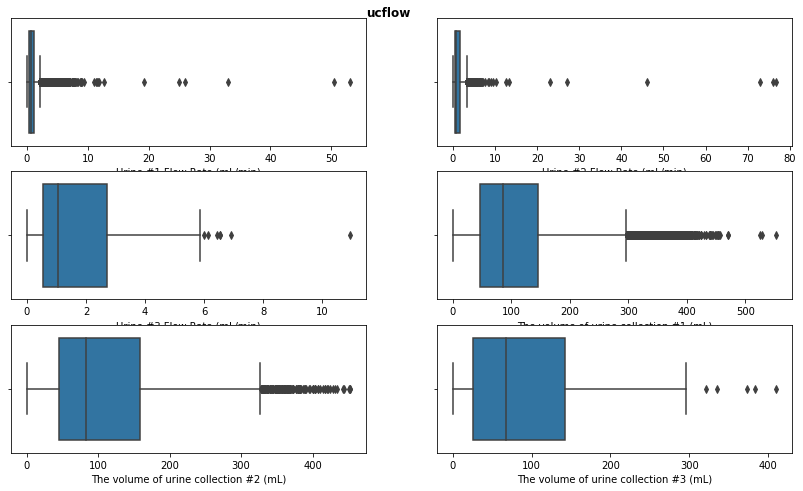

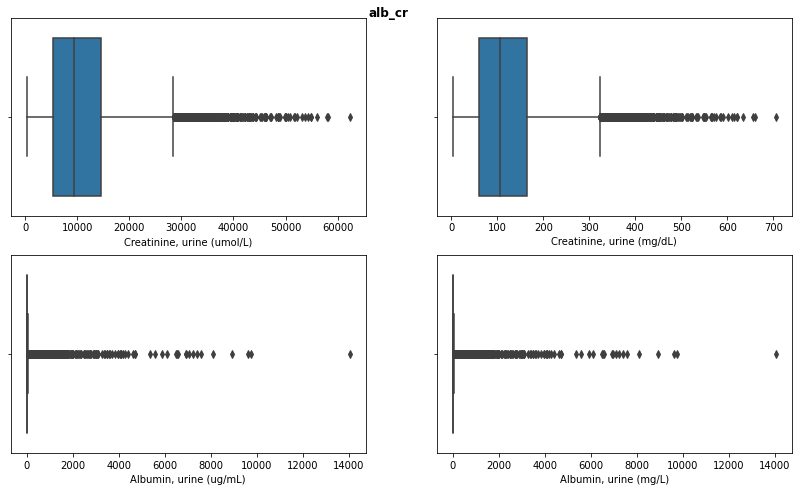

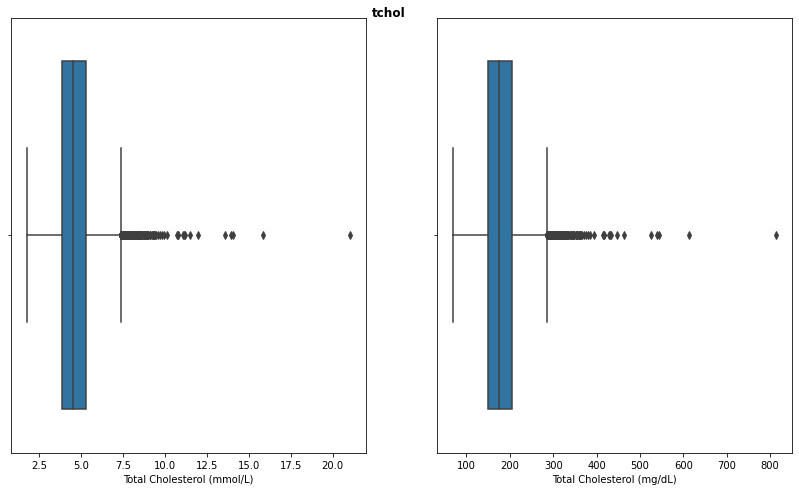

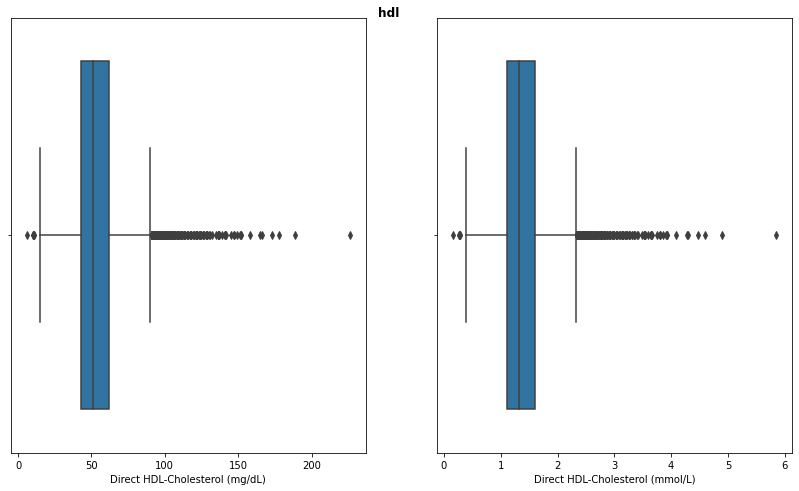

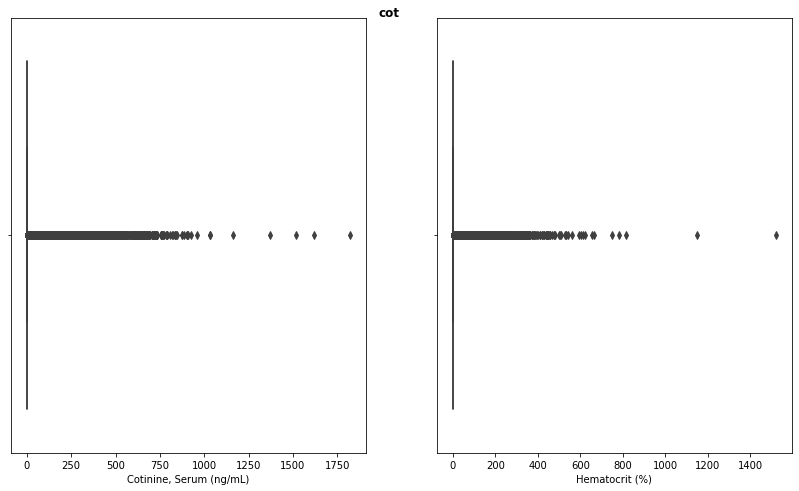

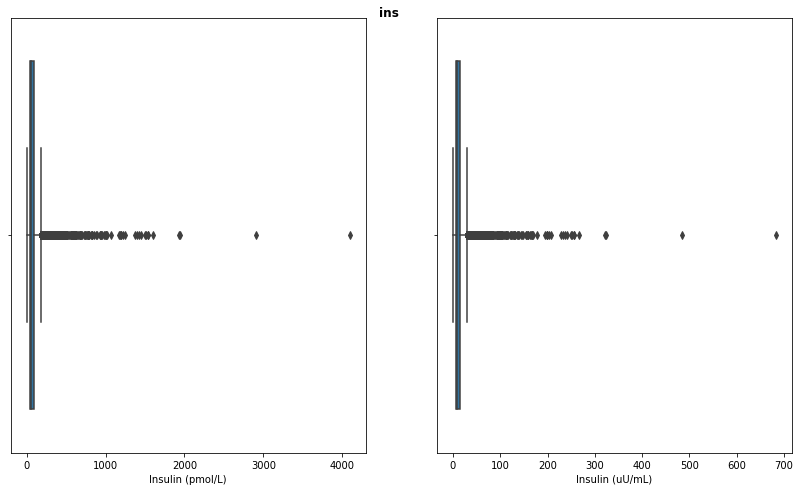

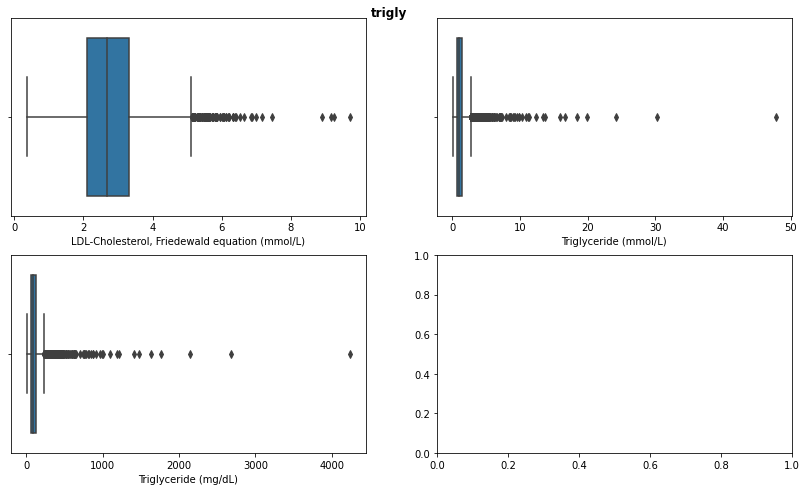

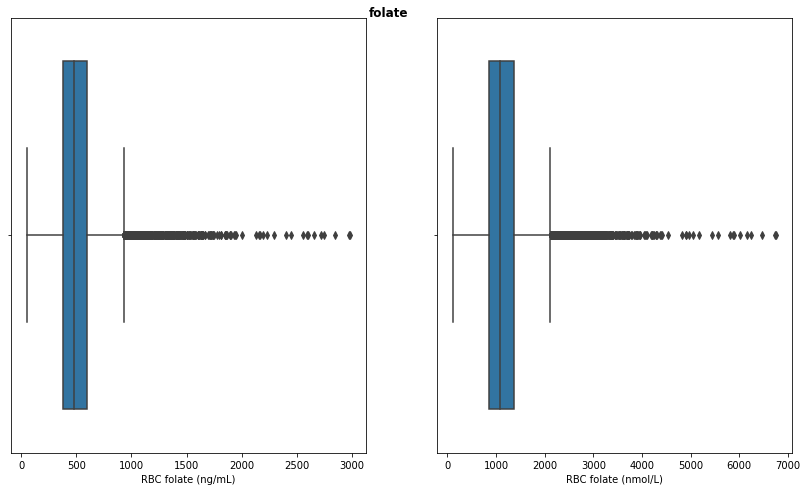

In [8]:
for name, df in full_dfs.items():
    if name != "cbc" and name != "biopro":
        if df.shape[1] < 3:
            fig = vi.rows_plotter(df, 2, "box", (14, 8), variable_names)
            fig.suptitle(name, y = .9, fontweight = "bold")
            plt.show()
        else:
            fig = vi.multi_axes_plotter(df, 2, "box", (14, 8), variable_names)
            fig.suptitle(name, y = .9, fontweight = "bold")
            plt.show()

There are quite a few outliers.

In [10]:
for name, df in full_dfs.items():
    print("\n", name , df.shape, "\n")
    print(df.describe())
    print("#" * 50)


 ucflow (24835, 6) 

           URDFLOW1     URDFLOW2    URDFLOW3       URXVOL1      URXVOL2  \
count  19826.000000  4542.000000  178.000000  23984.000000  4543.000000   
mean       0.896757     1.252169    1.780596    107.255962   112.351530   
std        1.067762     2.341204    1.757916     80.850932    89.679784   
min        0.000000     0.000000    0.000000      0.000000     0.000000   
25%        0.370000     0.464250    0.536000     46.000000    45.000000   
50%        0.634000     0.810500    1.056500     85.000000    83.000000   
75%        1.096000     1.577000    2.700750    146.000000   158.000000   
max       53.000000    76.667000   10.923000    552.000000   452.000000   

          URXVOL3  
count  178.000000  
mean    99.573034  
std     91.645829  
min      0.000000  
25%     25.500000  
50%     67.500000  
75%    142.000000  
max    410.000000  
##################################################

 alb_cr (24835, 4) 

             URXCRS       URXUCR        URXUMA   